In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data:
wnba_team_salaries = pd.read_csv('cleaned_data/top_12_wnba_team_salaries_2024.csv')
nba_player_salaries = pd.read_csv('cleaned_data/top_150_nba_player_salaries_2024.csv')
wnba_player_salaries = pd.read_csv('cleaned_data/top_150_wnba_player_salaries_2024.csv')
nba_o_per = pd.read_csv('cleaned_data/c_nba_top_50_offensive_per.csv')
wnba_o_per = pd.read_csv('cleaned_data/c_wnba_top_50_offensive_per.csv')
nba_d_per = pd.read_csv('cleaned_data/c_nba_top_50_defensive_per.csv')
wnba_d_per = pd.read_csv('cleaned_data/c_wnba_top_50_defensive_per.csv')

# Convert salaries to numeric, stripping out commas and dollar signs:
wnba_team_salaries['Total Salaries'] = wnba_team_salaries['Total Salaries'].replace(r'[\$,]', '', regex=True).astype(float)
nba_player_salaries['2024 Salary'] = nba_player_salaries['2024 Salary'].replace(r'[\$,]', '', regex=True).astype(float)
wnba_player_salaries['2024 Salary'] = wnba_player_salaries['2024 Salary'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate total WNBA team salaries:
total_wnba_team_salaries = wnba_team_salaries['Total Salaries'].sum()

# Calculate total WNBA player salaries:
total_wnba_player_salaries = wnba_player_salaries['2024 Salary'].sum()

# Get top earner in the NBA:
top_nba_earner = nba_player_salaries['2024 Salary'].max()
top_nba_player = nba_player_salaries.loc[nba_player_salaries['2024 Salary'].idxmax()]['Player']

# Calculate total combined O-PER and D-PER for NBA and WNBA:
total_nba_o_per = nba_o_per['O_PER'].sum()
total_wnba_o_per = wnba_o_per['O-PER'].sum()
total_nba_d_per = nba_d_per['D_PER'].sum()
total_wnba_d_per = wnba_d_per['D-PER'].sum()

# Calculate total combined PER:
total_nba_per = total_nba_o_per + total_nba_d_per
total_wnba_per = total_wnba_o_per + total_wnba_d_per

# Format salary values in millions for readability:
total_wnba_team_salaries_str = f"${total_wnba_team_salaries / 1_000_000:,.2f}M"
total_wnba_player_salaries_str = f"${total_wnba_player_salaries / 1_000_000:,.2f}M"
top_nba_earner_str = f"${top_nba_earner / 1_000_000:,.2f}M"

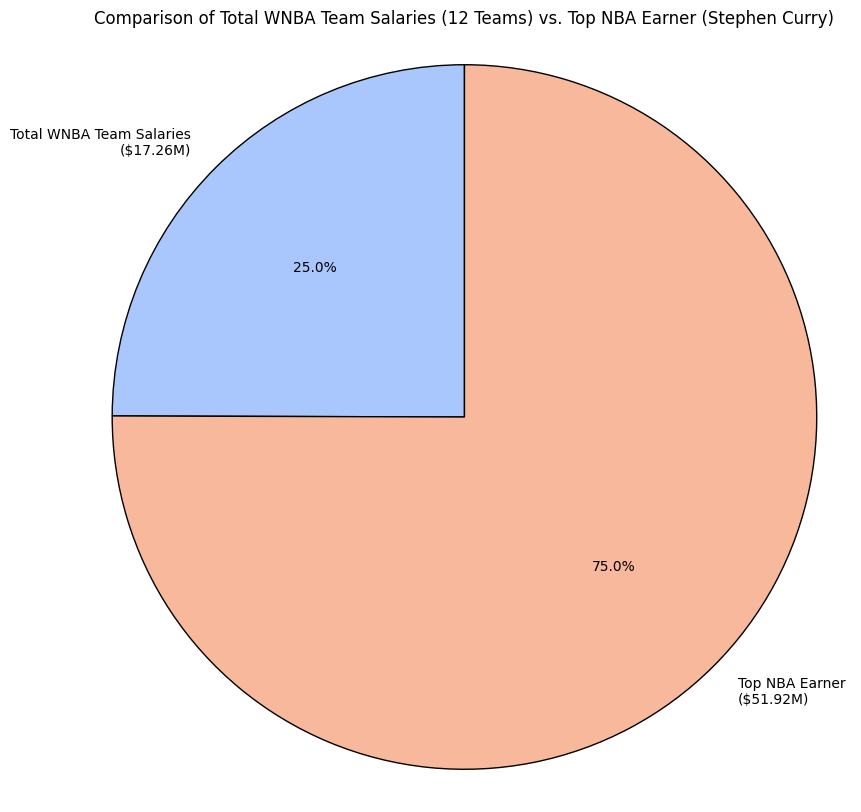

In [57]:
# Create DataFrame for pie chart data:
data_team = pd.DataFrame({
    'Category': ['Total WNBA Team Salaries (12 Teams)', f'Top NBA Earner: {top_nba_player}'],
    'Amount': [total_wnba_team_salaries, top_nba_earner]
})

# Create labels with actual values in millions:
labels_team = [
    f'Total WNBA Team Salaries\n({total_wnba_team_salaries_str})',
    f'Top NBA Earner\n({top_nba_earner_str})'
]

# Plot the pie chart:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('coolwarm', 2)
plt.pie(data_team['Amount'], labels=labels_team, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Comparison of Total WNBA Team Salaries (12 Teams) vs. Top NBA Earner (Stephen Curry)')
plt.axis('equal')
plt.show()

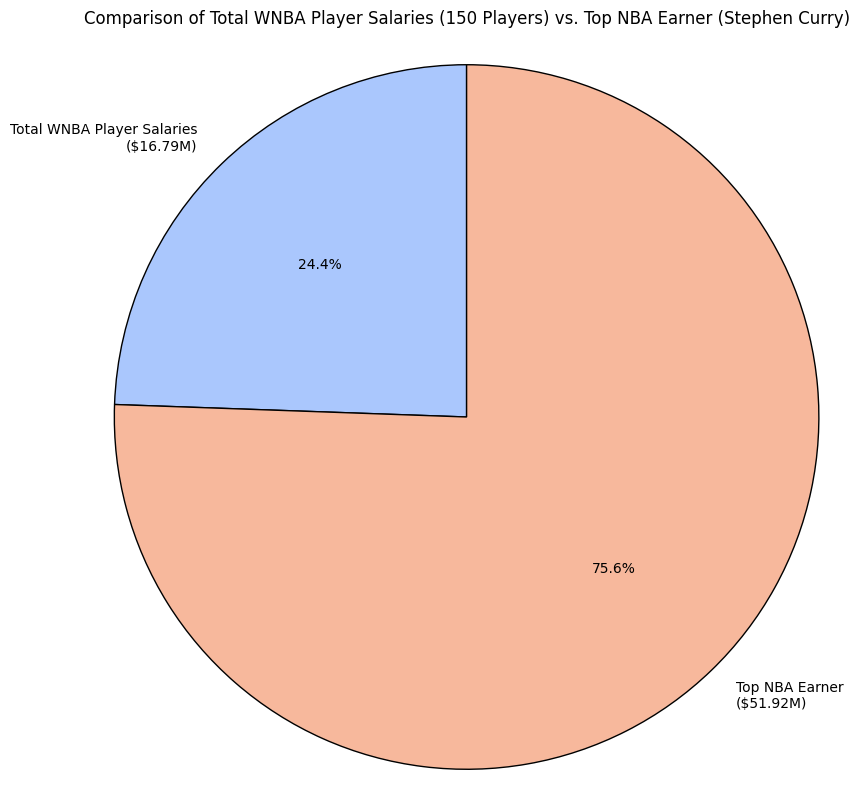

In [58]:
# Create DataFrame for pie chart data:
data_player = pd.DataFrame({
    'Category': ['Total WNBA Player Salaries', f'Top NBA Earner: {top_nba_player}'],
    'Amount': [total_wnba_player_salaries, top_nba_earner]
})

# Create labels with actual values in millions:
labels_player = [
    f'Total WNBA Player Salaries\n({total_wnba_player_salaries_str})',
    f'Top NBA Earner\n({top_nba_earner_str})'
]

# Plot the pie chart:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('coolwarm', 2)
plt.pie(data_player['Amount'], labels=labels_player, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Comparison of Total WNBA Player Salaries (150 Players) vs. Top NBA Earner (Stephen Curry)')
plt.axis('equal')
plt.show()

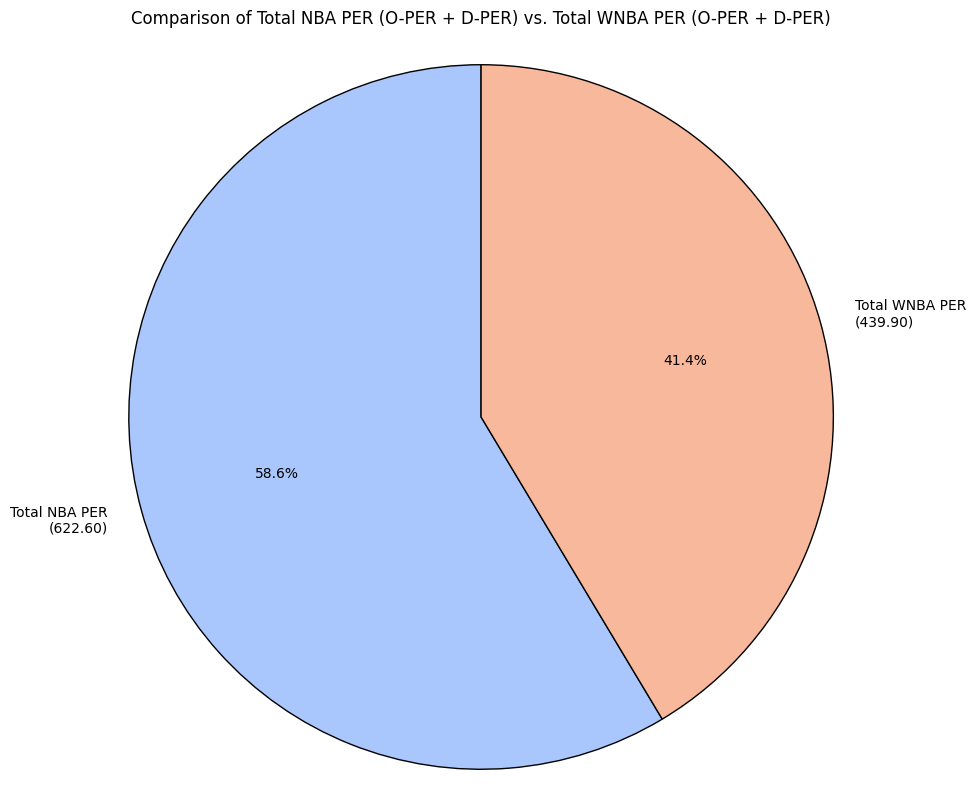

In [59]:
# Create DataFrame for pie chart data:
data_per = pd.DataFrame({
    'Category': ['Total NBA PER (O-PER + D-PER)', 'Total WNBA PER (O-PER + D-PER)'],
    'Amount': [total_nba_per, total_wnba_per]
})

# Create labels with actual PER values:
labels_per = [
    f'Total NBA PER\n({total_nba_per:.2f})',
    f'Total WNBA PER\n({total_wnba_per:.2f})'
]

# Plot the pie chart:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('coolwarm', 2)
plt.pie(data_per['Amount'], labels=labels_per, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Comparison of Total NBA PER (O-PER + D-PER) vs. Total WNBA PER (O-PER + D-PER)')
plt.axis('equal')
plt.show()